<a href="https://colab.research.google.com/github/yogvidwankhede/OIBSIP/blob/main/Unemployment%20Analysis/unemployment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

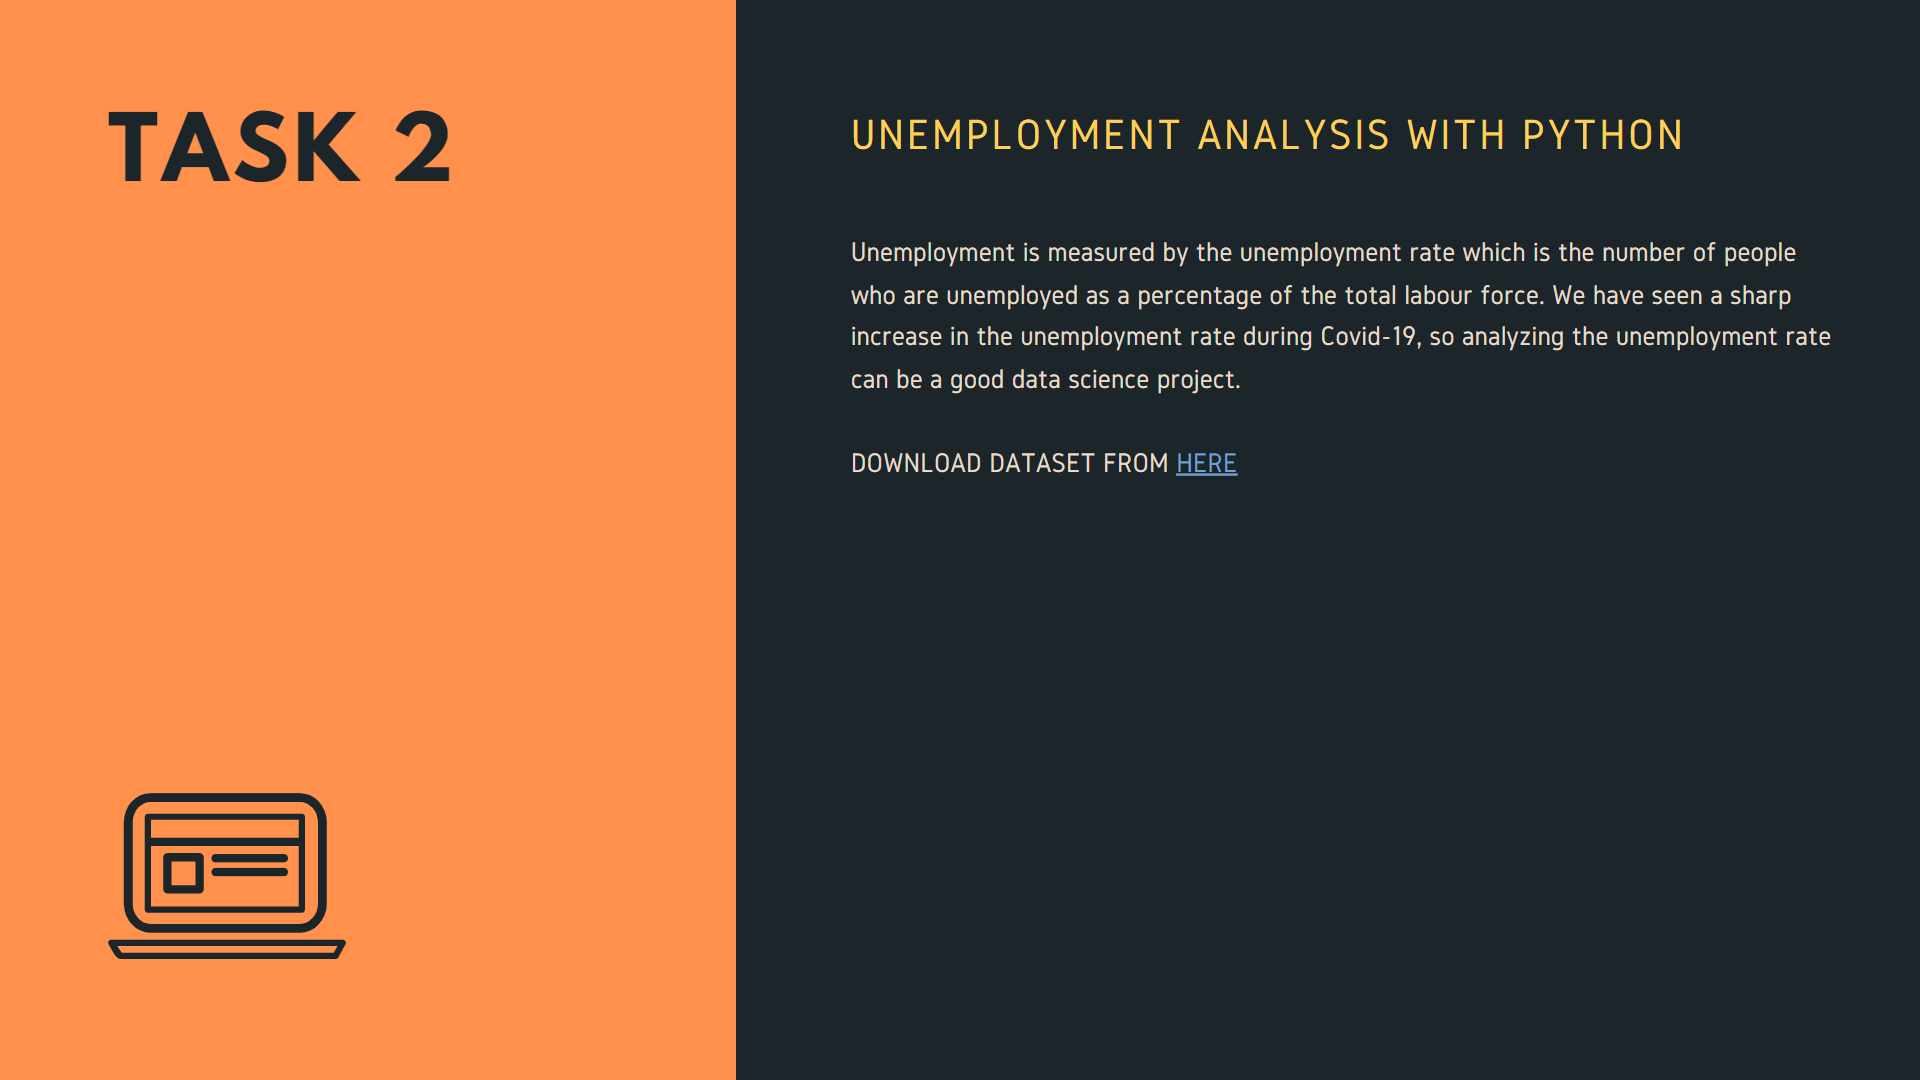



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
unemployment = pd.read_csv('/content/Unemployment in India.csv')                 #Unemployment data of india
unemployment_covid = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')  #Unemployment data during covid

In [3]:
unemployment.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
unemployment_covid.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [5]:
unemployment.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [6]:
unemployment = unemployment.dropna() # Dropping the null values

In [7]:
unemployment.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [8]:
unemployment_covid.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [9]:
unemployment.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [10]:
unemployment_covid.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

# EDA

<ipython-input-11-97c759b48ad3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds1 = unemployment.corr()


<Axes: >

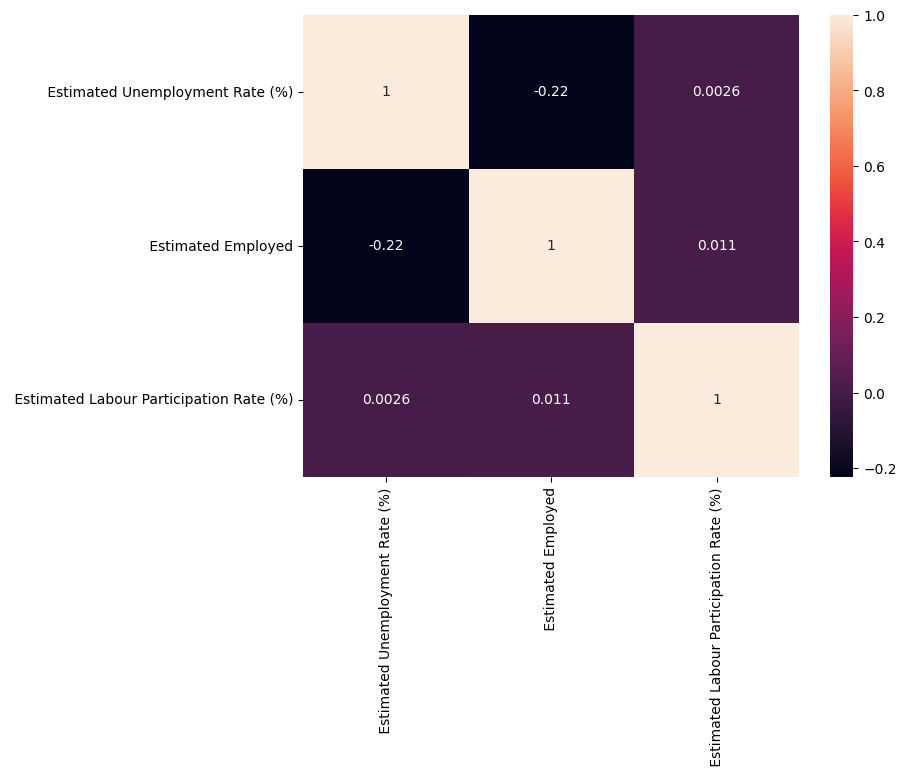

In [11]:
plt.figure(figsize=(8,6))
ds1 = unemployment.corr()
sns.heatmap(ds1, annot=True)

<ipython-input-12-9812c05b6ca1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds2 = unemployment_covid.corr()


<Axes: >

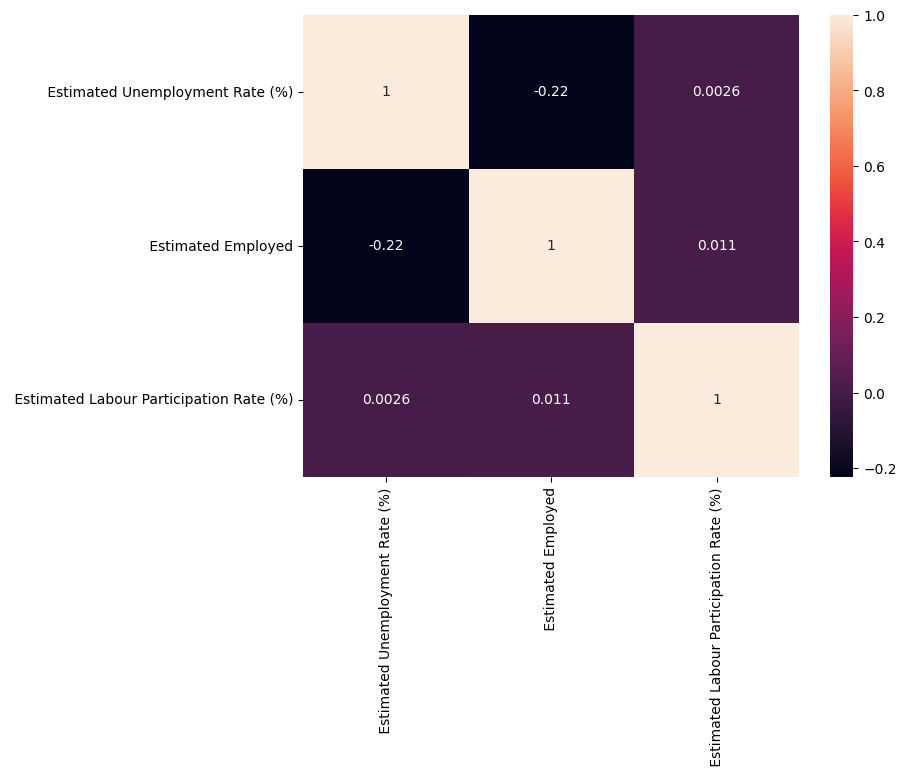

In [12]:
plt.figure(figsize=(8,6))
ds2 = unemployment_covid.corr()
sns.heatmap(ds1, annot=True)

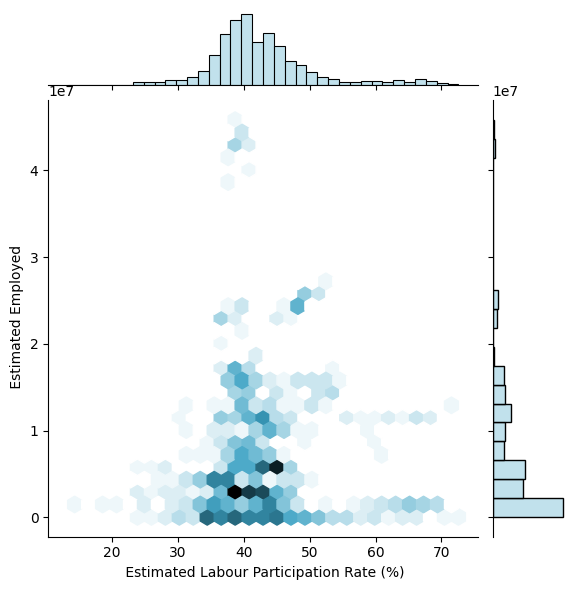

In [13]:
sns.jointplot(x=' Estimated Labour Participation Rate (%)', y=' Estimated Employed', data=unemployment, kind='hex',color='lightblue')

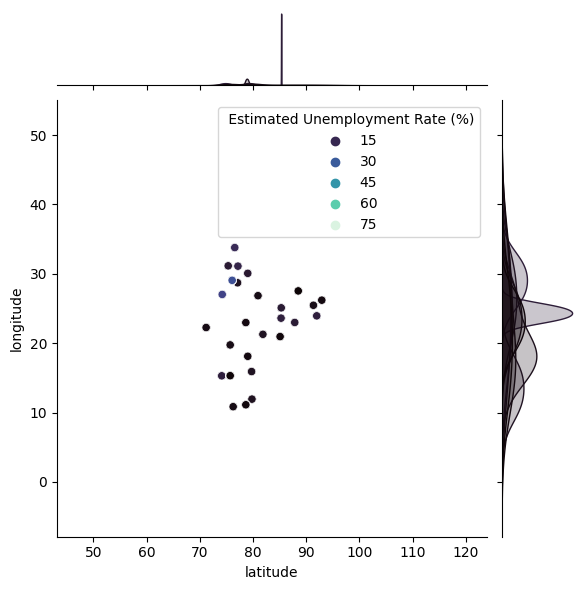

In [14]:
sns.jointplot(x='latitude', y='longitude', data=unemployment_covid, hue=" Estimated Unemployment Rate (%)", kind="scatter", palette='mako')

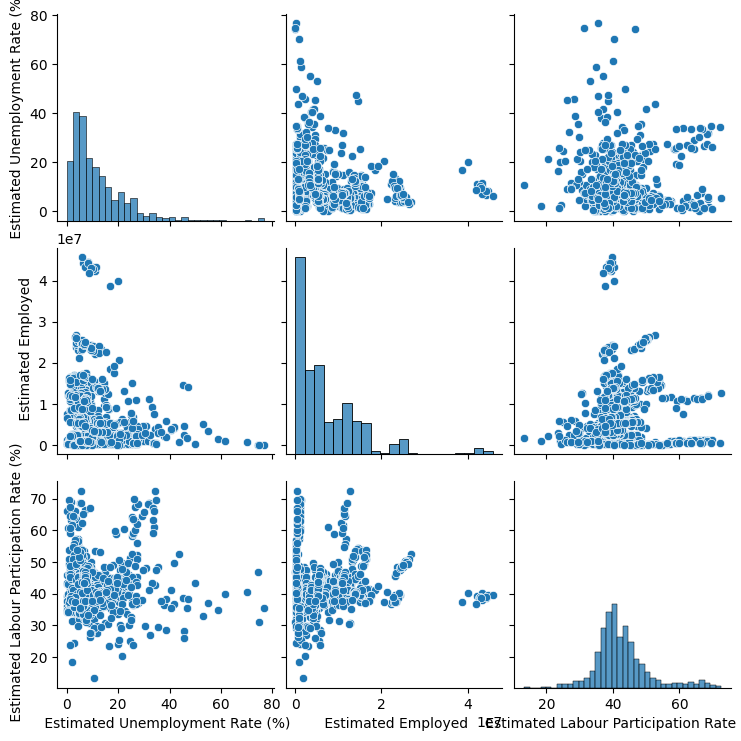

In [15]:
sns.pairplot(unemployment)

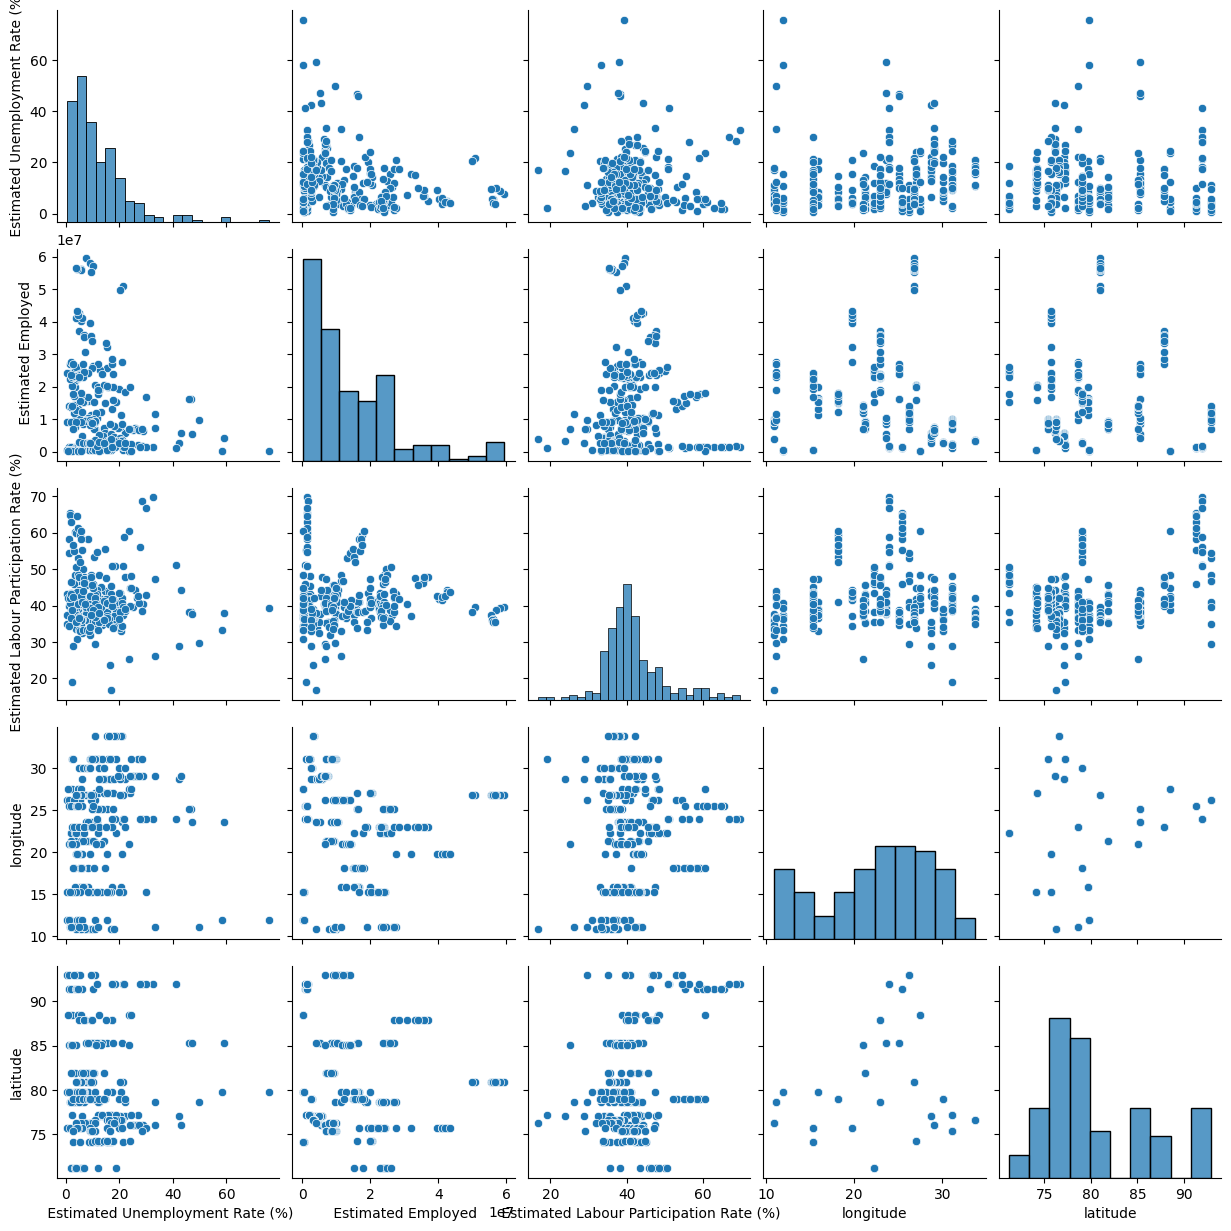

In [16]:
sns.pairplot(unemployment_covid)

<ipython-input-17-d04a278f8ee5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_data = unemployment.groupby('Region').sum()


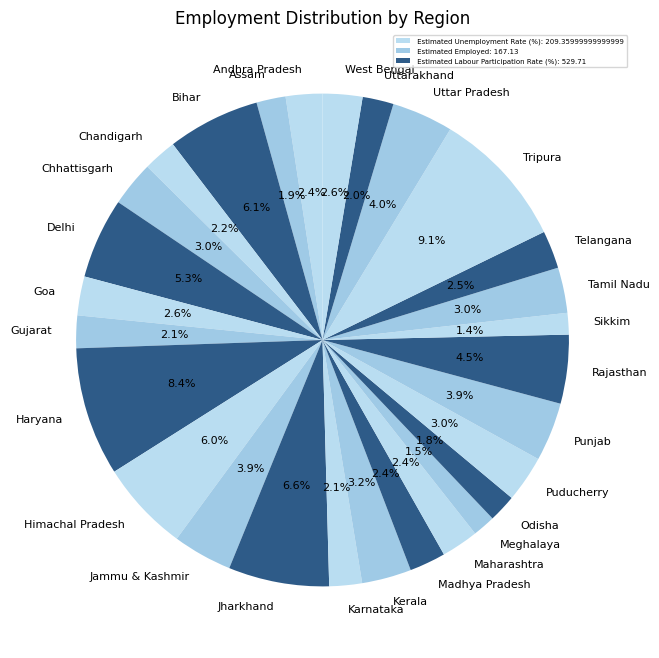

In [17]:

region_data = unemployment.groupby('Region').sum()

fig, ax = plt.subplots(figsize=(20, 8))
colors = ["#B9DDF1", "#9FCAE6", "#2E5B88"]
ax.pie(region_data[' Estimated Unemployment Rate (%)'], labels=region_data.index, autopct='%1.1f%%', startangle=90,textprops={'fontsize':8}, colors = colors)
ax.legend(loc='upper right', labels=[f'{l}: {s}' for l, s in zip(region_data, region_data[' Estimated Unemployment Rate (%)'])], prop={'size': 5})
ax.set_title('Employment Distribution by Region')
plt.show()


<ipython-input-18-2c80d3d253d6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_data1 = unemployment_covid.groupby('Region').sum()


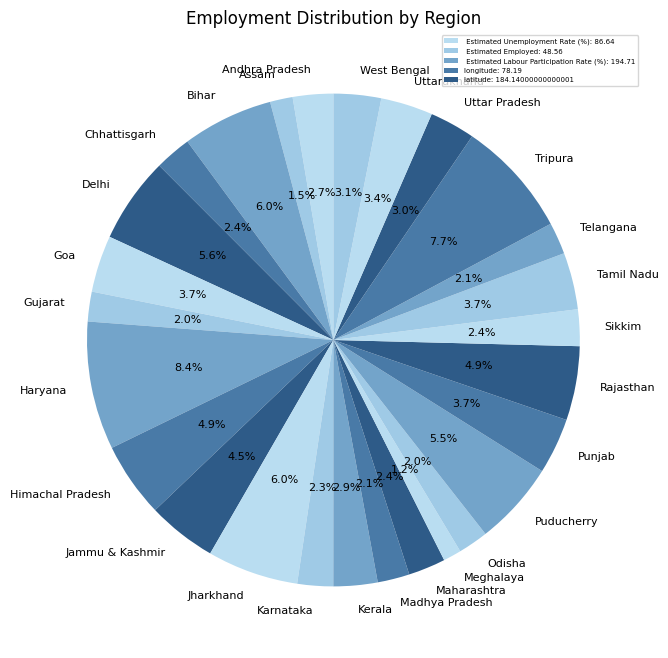

In [18]:
region_data1 = unemployment_covid.groupby('Region').sum()

fig, ax = plt.subplots(figsize=(20, 8))
colors = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88"]
ax.pie(region_data1[' Estimated Unemployment Rate (%)'], labels=region_data1.index, autopct='%1.1f%%', startangle=90,textprops={'fontsize':8}, colors = colors)
ax.legend(loc='upper right', labels=[f'{l}: {s}' for l, s in zip(region_data1, region_data1[' Estimated Unemployment Rate (%)'])], prop={'size': 5})
ax.set_title('Employment Distribution by Region')
plt.show()

<ipython-input-19-0ab3609339ec>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = unemployment.groupby(["Region", " Date"]).sum()


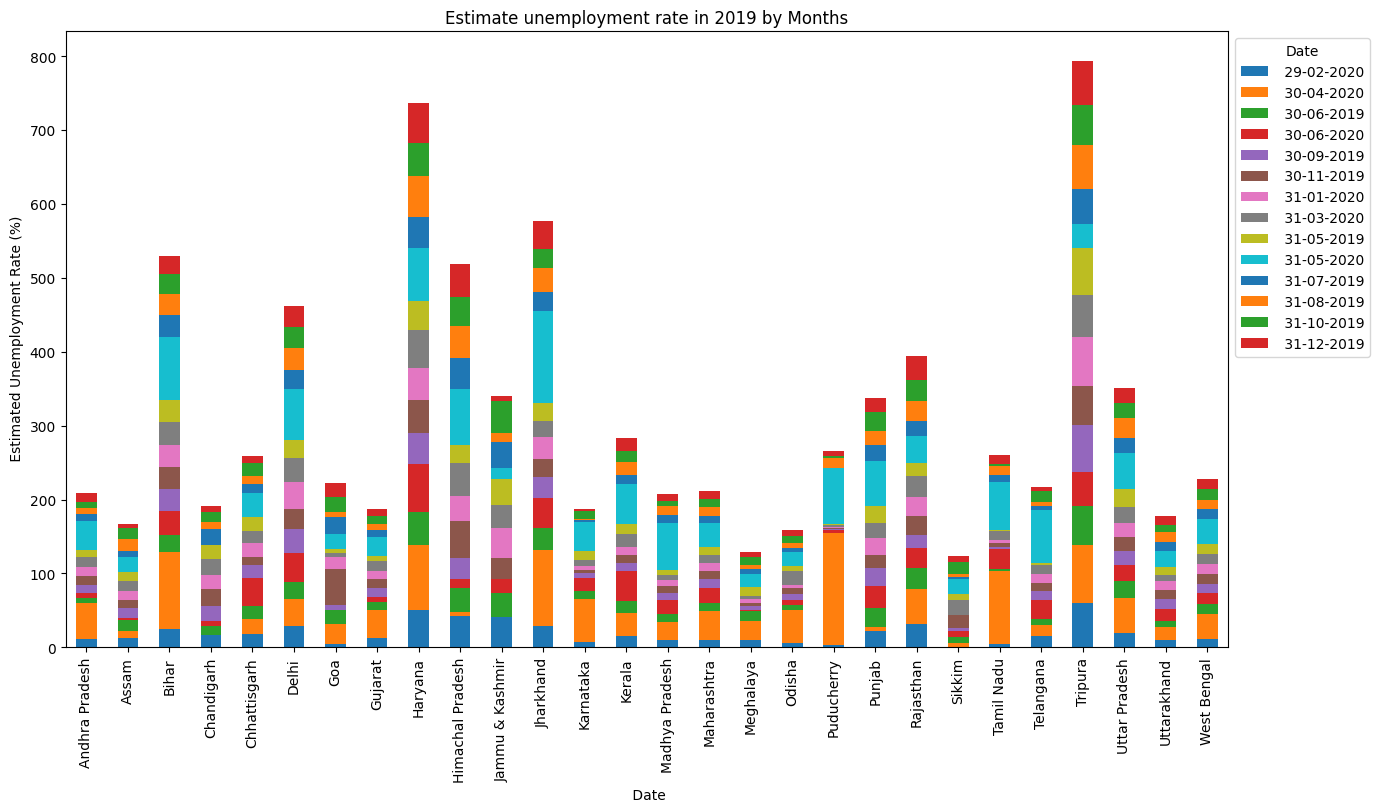

In [19]:
# Group data by region and date
grouped_df = unemployment.groupby(["Region", " Date"]).sum()

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(15,8))
grouped_df[" Estimated Unemployment Rate (%)"].unstack().plot.bar(stacked=True, ax=ax)

# Label the plot
ax.set_ylabel(" Estimated Unemployment Rate (%)")
ax.set_xlabel(" Date")
plt.title('Estimate unemployment rate in 2019 by Months')

# Arrange legend to the right upper corner
ax.legend(title="Date", loc='upper left', bbox_to_anchor=(1,1))

# Show plot
plt.show()

<ipython-input-20-9303eebbddda>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df1 = unemployment_covid.groupby(["Region", " Date"]).sum()


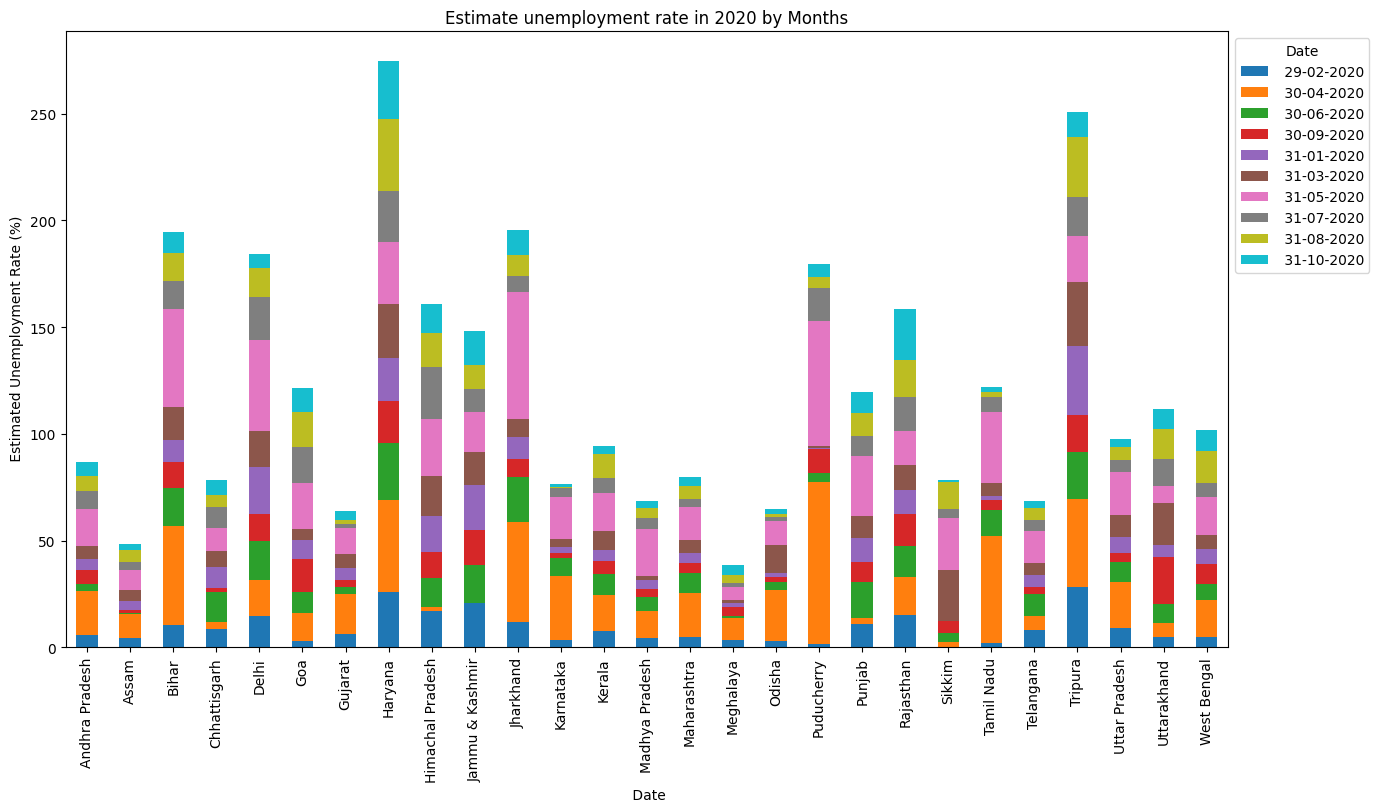

In [20]:
# Group data by region and date
grouped_df1 = unemployment_covid.groupby(["Region", " Date"]).sum()

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(15,8))
grouped_df1[" Estimated Unemployment Rate (%)"].unstack().plot.bar(stacked=True, ax=ax)

# Label the plot
ax.set_ylabel(" Estimated Unemployment Rate (%)")
ax.set_xlabel(" Date")
plt.title('Estimate unemployment rate in 2020 by Months')

# Arrange legend to the right upper corner
ax.legend(title="Date", loc='upper left', bbox_to_anchor=(1,1))

# Show plot
plt.show()

[Text(0, 0, 'Andhra Pradesh'),
 Text(1, 0, 'Assam'),
 Text(2, 0, 'Bihar'),
 Text(3, 0, 'Chhattisgarh'),
 Text(4, 0, 'Delhi'),
 Text(5, 0, 'Goa'),
 Text(6, 0, 'Gujarat'),
 Text(7, 0, 'Haryana'),
 Text(8, 0, 'Himachal Pradesh'),
 Text(9, 0, 'Jammu & Kashmir'),
 Text(10, 0, 'Jharkhand'),
 Text(11, 0, 'Karnataka'),
 Text(12, 0, 'Kerala'),
 Text(13, 0, 'Madhya Pradesh'),
 Text(14, 0, 'Maharashtra'),
 Text(15, 0, 'Meghalaya'),
 Text(16, 0, 'Odisha'),
 Text(17, 0, 'Puducherry'),
 Text(18, 0, 'Punjab'),
 Text(19, 0, 'Rajasthan'),
 Text(20, 0, 'Sikkim'),
 Text(21, 0, 'Tamil Nadu'),
 Text(22, 0, 'Telangana'),
 Text(23, 0, 'Tripura'),
 Text(24, 0, 'Uttar Pradesh'),
 Text(25, 0, 'Uttarakhand'),
 Text(26, 0, 'West Bengal')]

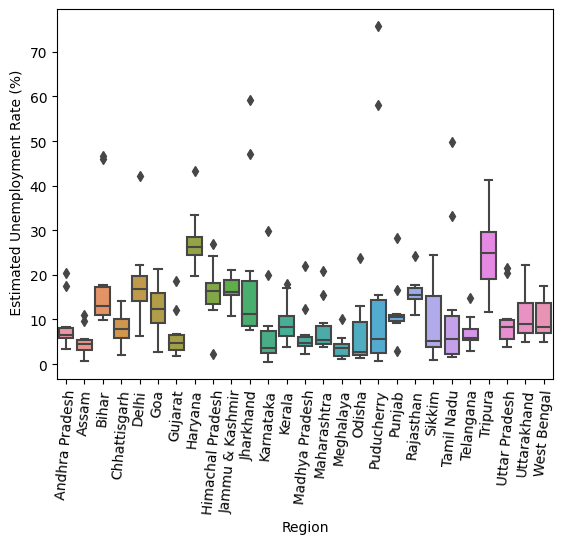

In [21]:
g=sns.boxplot(data=unemployment_covid, x='Region', y=' Estimated Unemployment Rate (%)')
g.set_xticklabels(g.get_xticklabels(), rotation=85)

In [22]:
x_regions = np.array(unemployment['Region'])
x_regions_cov = np.array(unemployment_covid['Region'])
y_unp = np.array(unemployment[' Estimated Labour Participation Rate (%)'])
y_unp_covid = np.array(unemployment_covid[' Estimated Labour Participation Rate (%)'])

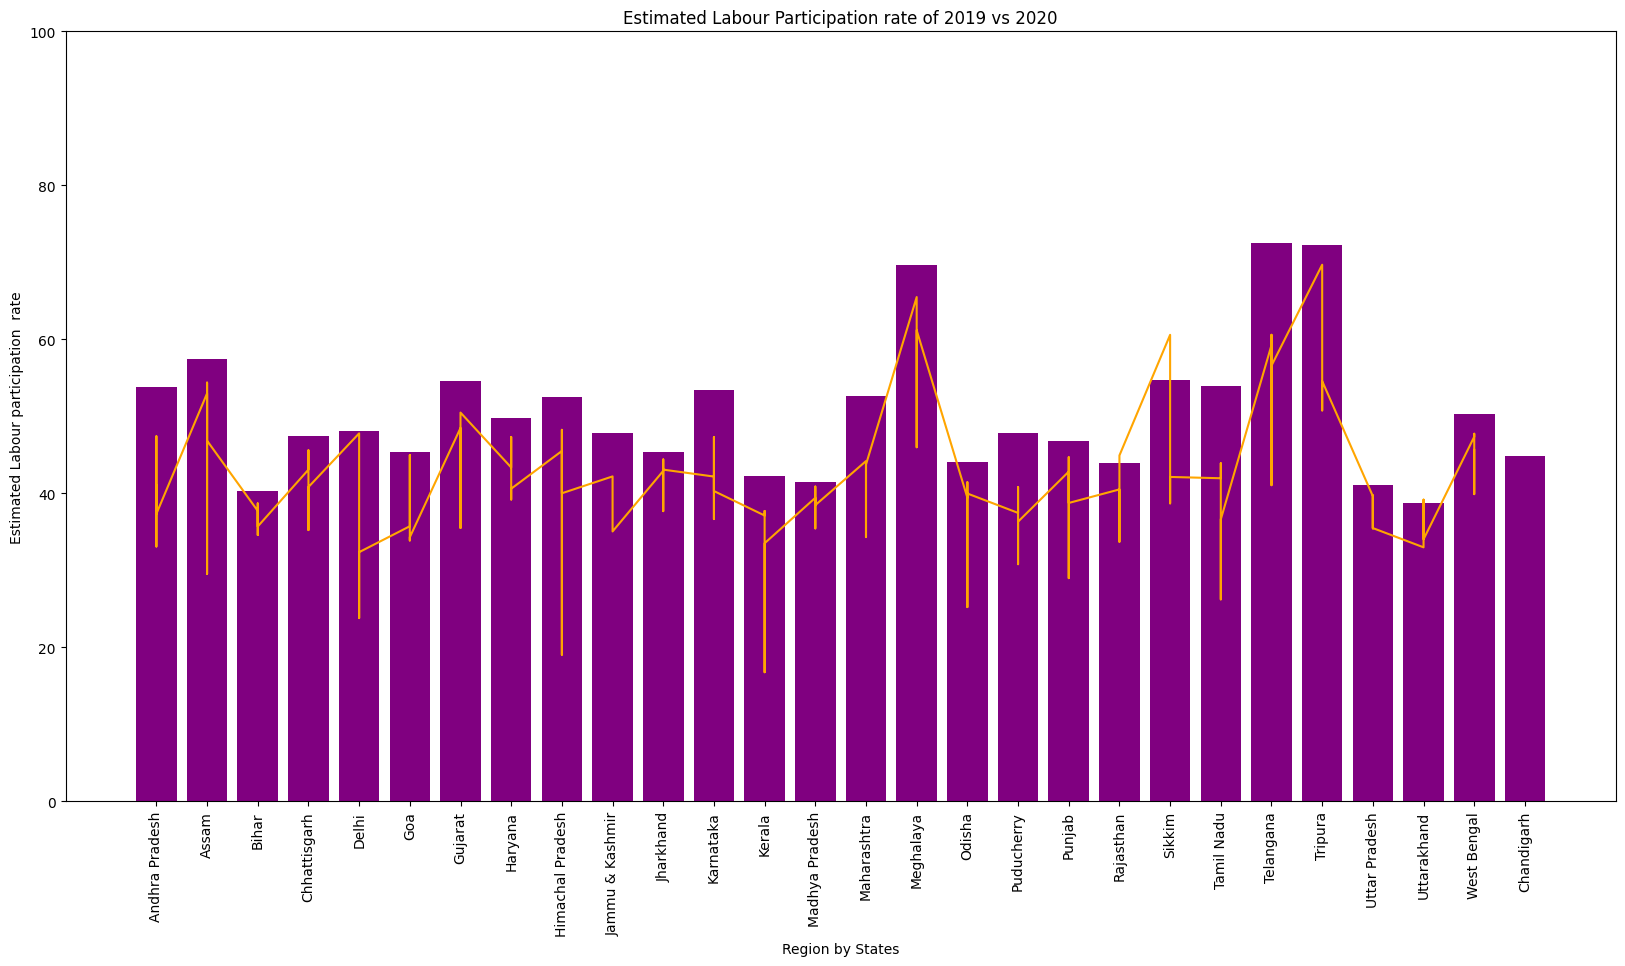

In [23]:
fig = plt.figure(figsize=(20, 10))

plt.bar(x_regions, y_unp, color= 'purple')
plt.plot(x_regions_cov, y_unp_covid, color= 'orange')
plt.ylim(0, 100)

labels = sorted(set(unemployment['Region']))
plt.xticks(labels, rotation='vertical')

plt.xlabel('Region by States')
plt.ylabel('Estimated Labour participation  rate')
plt.title('Estimated Labour Participation rate of 2019 vs 2020')

plt.show()

In [24]:
!pip3 install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 95.8 MB/s eta 0:00:00


<ipython-input-25-7f216803bb67>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_data1 = unemployment_covid.groupby('Region').sum()


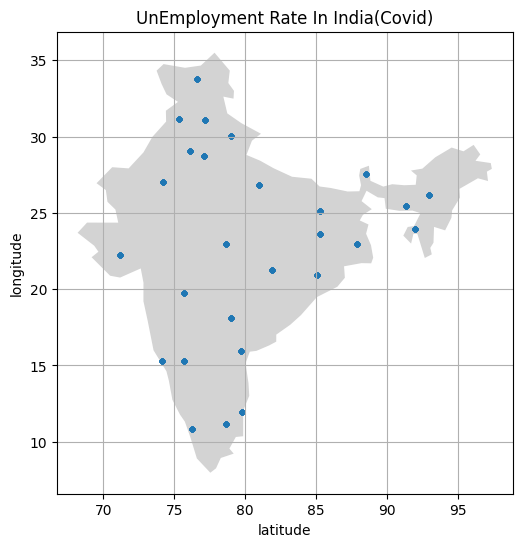

In [25]:
import geopandas as gpd
# initialize an axis
fig, ax = plt.subplots(figsize=(8, 6))
# plot map on axis
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "India"].plot(color="lightgrey", ax=ax)
# parse dates for plot's title
first_month = unemployment_covid[" Estimated Employed"].min()
last_month = unemployment_covid[" Estimated Employed"].max()

region_data1 = unemployment_covid.groupby('Region').sum()
# plot points
unemployment_covid.plot(x="latitude", y="longitude", kind="scatter",
        title=f"UnEmployment Rate In India(Covid)",
        ax=ax, s=10)

ax.grid(visible=True, alpha=1)
plt.show()